# Exploratory data analysis

## Loading libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate

## Loading data

In [2]:
df = pd.read_csv('../data/learning_data.csv')
df.head()

,ptnum,label,scc,C-103579009,C-125680007,C-186034007,C-263495000,C-398070004,C-424144002,C-72514-3,...,C-92140-3,C-92141-1,C-92142-9,C-94040-3,C-94531-1,C-979092,C-993452,C-997501,C-999998,C-999999
0,p17767.2,0,101,white,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,p3832.1,0,110,white,m,nonhispanic,m,massachusetts,50t70,normal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,p10784.2,0,127,black,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,p17630,0,129,white,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,p17983,1,69,white,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**We will be predicting value in column 'label' (1 - patient diagnosed with lung cancer, 0 - patient undiagnosed ) using the other columns as features.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9048 entries, 0 to 9047
Columns: 785 entries, ptnum to C-999999
dtypes: float64(59), int64(2), object(724)
memory usage: 54.2+ MB


In [4]:
df.describe()

,label,scc,C-75443-2,C-84215-3,C-26453-1,C-26464-8,C-26515-7,C-30385-9,C-30428-7,C-33037-3,...,C-713-8,C-727711,C-731-0,C-736-9,C-742-7,C-751-8,C-770-8,C-82078001,C-86849004,C-86964003
count,9048.000000,9048.000000,16.0,16.0,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,...,256.000000,0.0,256.000000,256.00000,256.000000,256.000000,256.000000,0.0,0.0,0.0
mean,0.252874,103.895999,1.0,1.0,5.125166,13.175497,308.200662,13.006623,87.692715,8.339073,...,4.513672,NaN,0.945664,15.17957,0.948047,2.679687,27.573555,NaN,NaN,NaN
std,0.434683,21.988655,0.0,0.0,0.379863,1.223817,88.495507,0.899605,4.636940,3.508351,...,0.255184,NaN,0.154276,1.67533,0.075522,0.225392,3.014690,NaN,NaN,NaN
min,0.000000,9.000000,1.0,1.0,4.500000,11.100000,155.300000,11.600000,80.000000,2.000000,...,3.740000,NaN,0.500000,10.32000,0.750000,2.080000,18.610000,NaN,NaN,NaN
25%,0.000000,100.000000,1.0,1.0,4.800000,12.000000,232.950000,12.150000,83.600000,5.500000,...,4.370000,NaN,0.980000,14.08250,0.900000,2.540000,25.457500,NaN,NaN,NaN
50%,0.000000,107.000000,1.0,1.0,5.100000,13.400000,304.100000,13.100000,88.100000,8.200000,...,4.500000,NaN,1.000000,15.19000,0.950000,2.690000,27.840000,NaN,NaN,NaN
75%,1.000000,116.000000,1.0,1.0,5.400000,14.300000,386.550000,13.800000,91.400000,11.350000,...,4.680000,NaN,1.020000,16.38500,1.000000,2.830000,29.502500,NaN,NaN,NaN
max,1.000000,190.000000,1.0,1.0,5.900000,15.000000,449.900000,14.600000,96.000000,14.900000,...,5.240000,NaN,1.090000,20.15000,1.160000,3.260000,34.850000,NaN,NaN,NaN


## Nulls

In [5]:
null_percentages = df.isnull().mean()
columns_with_nulls_over_60_percent = null_percentages[null_percentages>0.6]
columns_with_nulls_over_60_percent_df = columns_with_nulls_over_60_percent.reset_index()
columns_with_nulls_over_60_percent_df.columns = ['Column', 'Nulls']
print('First 10 columns with over 60% nulls:')
print(tabulate(columns_with_nulls_over_60_percent_df.head(10), headers='keys', tablefmt='simple'))

First 10 columns with over 60% nulls:
    Column          Nulls
--  -----------  --------
 0  C-762993000  0.625221
 1  C-2857-1     0.750663
 2  C-410006001  0.750663
 3  C-10834-0    0.610522
 4  C-10509002   0.608311
 5  C-58000006   0.723696
 6  C-46288-7    0.811561
 7  C-65575008   0.811561
 8  C-314231     0.764699
 9  C-314076     0.725796


We will drop columns with over 60% of nulls.

In [6]:
df = df.drop(columns_with_nulls_over_60_percent.index, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9048 entries, 0 to 9047
Data columns (total 75 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ptnum              9048 non-null   object
 1   label              9048 non-null   int64 
 2   scc                9048 non-null   int64 
 3   C-103579009        9048 non-null   object
 4   C-125680007        9048 non-null   object
 5   C-186034007        9048 non-null   object
 6   C-263495000        9048 non-null   object
 7   C-398070004        9048 non-null   object
 8   C-424144002        9048 non-null   object
 9   C-72514-3          9044 non-null   object
 10  C-140              9043 non-null   object
 11  C-18262-6          9043 non-null   object
 12  C-2085-9           9043 non-null   object
 13  C-2093-3           9043 non-null   object
 14  C-2571-8           9043 non-null   object
 15  C-39156-5          9043 non-null   object
 16  C-710824005        9043 non-null   object


Another not neccesary column is ptnum, which is just a patient number

In [7]:
df = df.drop('ptnum', axis=1)

## Decoding column names

In [8]:
df_codes = pd.read_csv('../data/codes.csv')
code_to_name = df_codes.set_index('code')['name'].to_dict()
df = df.rename(columns=code_to_name)
df.head()

,label,scc,race,marital,ethnic,gender,state,age,Pain severity - 0-10 verbal numeric rating [Score] - Reported,Influenza seasonal injectable preservative free,...,Bilirubin.total [Mass/volume] in Serum or Plasma,Body temperature,Initial patient assessment (procedure),Development of individualized plan of care (procedure),Depression screening using Patient Health Questionnaire Nine Item score (procedure),Acetaminophen 325 MG Oral Tablet,Acute viral pharyngitis (disorder),Hospice care (regime/therapy),Notifications (procedure),Certification procedure (procedure)
0,0,101,white,m,nonhispanic,m,massachusetts,50t70,abnormal,True,...,NaN,normal,True,True,True,True,True,NaN,NaN,NaN
1,0,110,white,m,nonhispanic,m,massachusetts,50t70,normal,True,...,normal,NaN,True,True,True,True,NaN,True,True,True
2,0,127,black,m,nonhispanic,m,massachusetts,50t70,abnormal,True,...,normal,NaN,True,True,NaN,True,NaN,True,True,True
3,0,129,white,m,nonhispanic,m,massachusetts,50t70,abnormal,True,...,normal,NaN,True,True,True,True,NaN,True,True,True
4,1,69,white,m,nonhispanic,m,massachusetts,50t70,abnormal,True,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN


In [9]:
column_names = df.columns
print(column_names)

Index(['label', 'scc', 'race', 'marital', 'ethnic', 'gender', 'state', 'age',
       'Pain severity - 0-10 verbal numeric rating [Score] - Reported',
       'Influenza  seasonal  injectable  preservative free',
       'Low Density Lipoprotein Cholesterol',
       'High Density Lipoprotein Cholesterol', 'Total Cholesterol',
       'Triglycerides', 'Body Mass Index',
       'Assessment of health and social care needs (procedure)',
       'Tobacco smoking status NHIS', 'Diastolic Blood Pressure',
       'Systolic Blood Pressure', 'Heart rate', 'Respiratory rate',
       'Stress (finding)', 'Depression screening (procedure)',
       'Depression screening using Patient Health Questionnaire Two-Item score (procedure)',
       'Hemoglobin [Mass/volume] in Blood',
       'Erythrocyte distribution width [Entitic volume] by Automated count',
       'Platelet mean volume [Entitic volume] in Blood by Automated count',
       'Leukocytes [#/volume] in Blood by Automated count',
       'Platelets [#

## Destribution of categorical values

In [10]:
categorical_columns = df.select_dtypes(include = ['object'])

In [11]:
df.shape

(9048, 74)

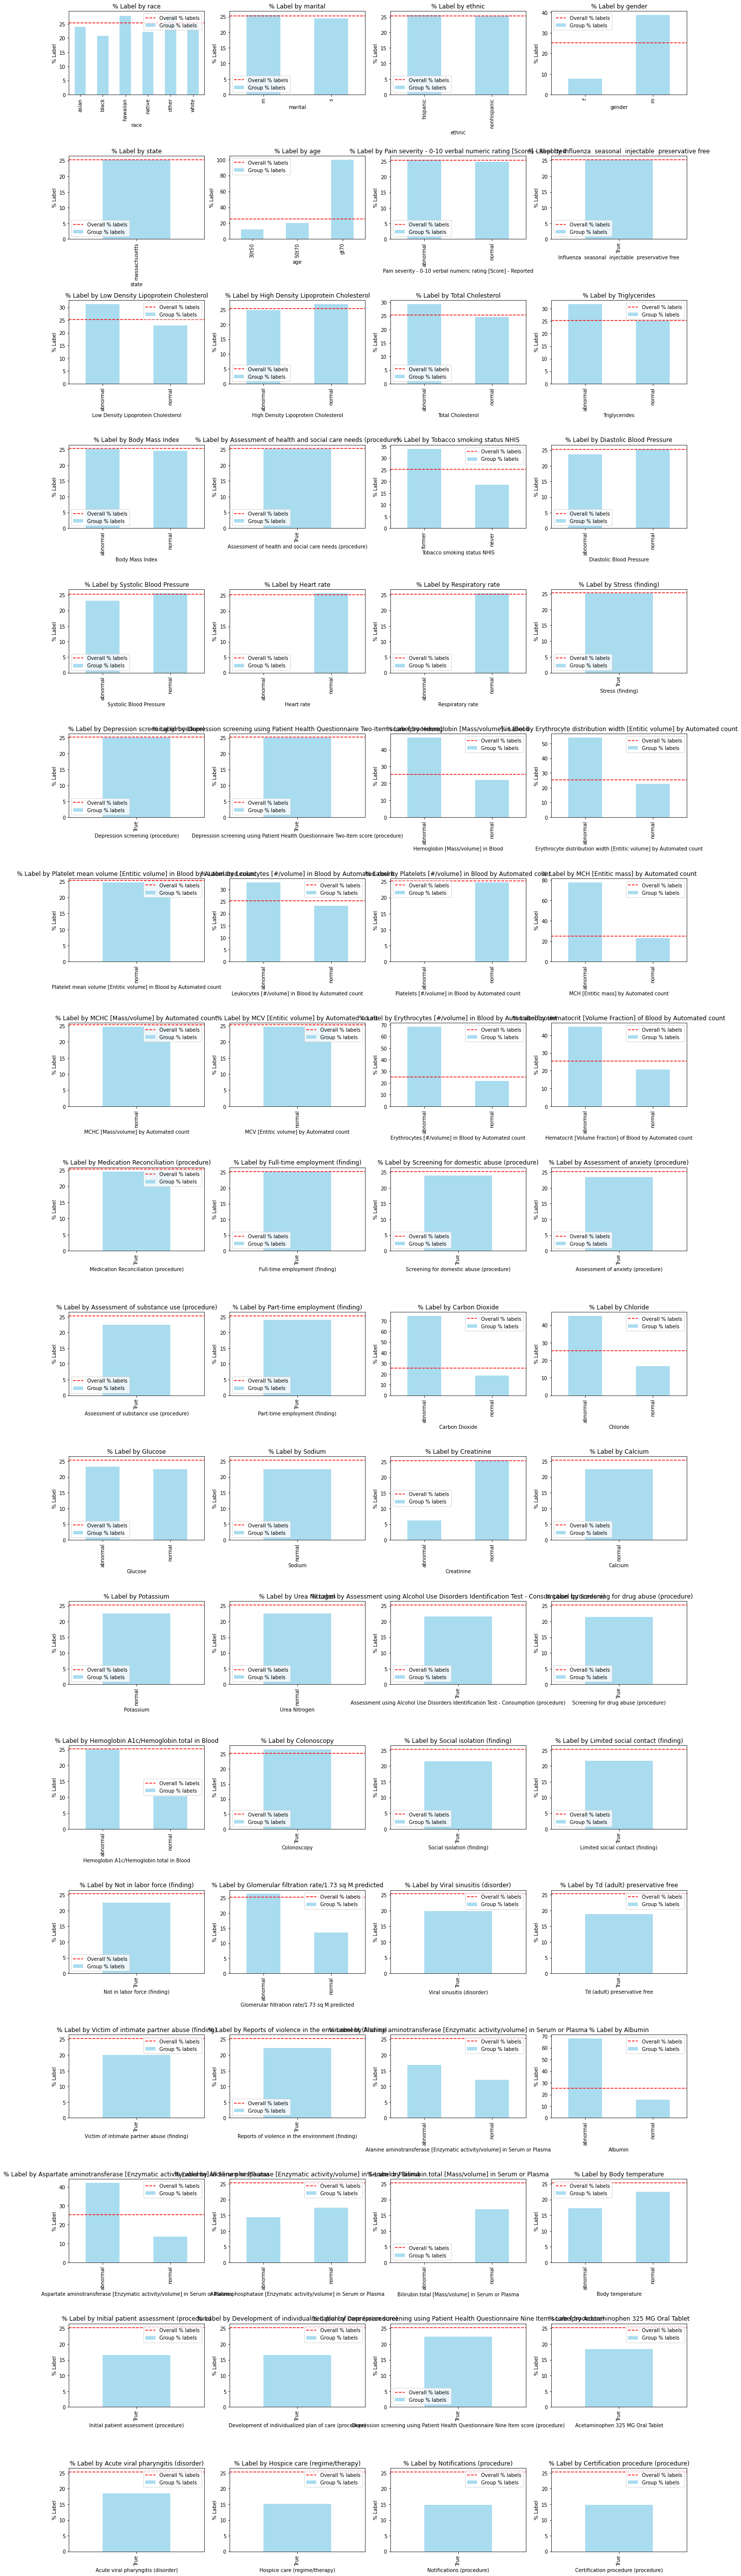

In [12]:
label_percentage = {}
for column in categorical_columns:
    label_percentage[column] = df.groupby(column)['label'].mean() * 100

overall_label_percentage = df['label'].mean() * 100

fig, axes = plt.subplots(nrows = 18, ncols = 4, figsize = (18, 72))

axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    ax = axes[i]
    label_percentage[column].plot(kind = 'bar', ax = ax, color = 'skyblue', alpha = 0.7, label = 'Group % labels')
    ax.axhline(overall_label_percentage, color = 'red', linestyle = '--', label = 'Overall % labels')
    ax.set_title(f'% Label by {column}')
    ax.set_ylabel('% Label')
    ax.legend()

plt.tight_layout()
plt.show()

### Conclusions
24,47 % patients  have a label of 1

**Columns where a difference between label and variable distribution is visible**
- age - all patients over 70 have label 1
- gender - women diagnosed less often than average, men more often
- Low Density Lipoprotein Cholesterol - people in the abnormal category are diagnosed more often
- Total Cholesterol - little difference for the abnormal category 
- Triglycerides - little difference for the abnormal category
- Tabacco smoking status - former smokers diagnosed more often, never smokers less often
- Hemoglobin in Blood - people in the abnormal category are diagnosed significantly more often
- MCH (Entitic mass) by Automated count - people in the abnormal category are diagnosed significantly more often, > 60%
- Erythrocytes (#/volume) in Blood by Automated count - people in the abnormal category are diagnosed significantly more often, > 60 %
- Hematocrit (Volume Fraction) of Blood - people in the abnormal category are diagnosed significantly more often, > 40%
- Carbon Dioxide - people in the abnormal category are diagnosed significantly more often, > 60%
- Chloride - people in the abnormal category are diagnosed significantly more often, > 40%, people in the normal category less often, 15%
- Creatinine - people in the normal category are significantly less diagnosed, < 10%
- Hemoglobin A1c/Hemoglobin.total in Blood - people in the normal category are significantly less diagnosed, < 10%
- Albumin - people in the abnormal category are diagnosed significantly more often, > 60%
- Aspartate aminotransferase [Enzymatic activity/volume] in Serum or Plasma - people in the abnormal category are diagnosed significantly more often, > 40%


**Other conclusions**
- column state can be removed - all patients are from the same state
- column ethnic can be removed - the same distribution for each variable
- column race column can also be removed
- many columns have only the True category, they do not have the False category, everything else is null, most have a % True around 20%, i.e. about a percentage of patients with label = 1 -> we will also drop them




In [13]:
for column in df.columns:
    unique_values = df[column].dropna().unique()
    if len(unique_values) == 1:
        df.drop(columns=[column], inplace=True)

df.drop(columns=['race', 'ethnic'], inplace=True)

## Encoding categorical variables

 Only age can be ordered, so we will encode it as int.

In [14]:
df['age'] = df['age'].map({'30t50': 1, '50t70': 2, 'gt70': 3}) 


If unique values in column are 'normal' and 'abnormal' we will change them to 0 and 1.

In [15]:
df2 = df.copy()
for col in df2.columns:
    unique_values = df2[col].dropna().unique()
    if len(unique_values) == 2:
        if unique_values[0] == 'normal' and unique_values[1] == 'abnormal':
            df2[col] = df2[col].map({unique_values[0]: 0, unique_values[1]: 1})
        elif unique_values[0] == 'abnormal' and unique_values[1] == 'normal':
            df2[col] = df2[col].map({unique_values[0]: 1, unique_values[1]: 0})
df2

,label,scc,marital,gender,age,Pain severity - 0-10 verbal numeric rating [Score] - Reported,Low Density Lipoprotein Cholesterol,High Density Lipoprotein Cholesterol,Total Cholesterol,Triglycerides,...,Glucose,Creatinine,Hemoglobin A1c/Hemoglobin.total in Blood,Glomerular filtration rate/1.73 sq M.predicted,Alanine aminotransferase [Enzymatic activity/volume] in Serum or Plasma,Albumin,Aspartate aminotransferase [Enzymatic activity/volume] in Serum or Plasma,Alkaline phosphatase [Enzymatic activity/volume] in Serum or Plasma,Bilirubin.total [Mass/volume] in Serum or Plasma,Body temperature
0,0,101,m,m,2,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,0,110,m,m,2,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
2,0,127,m,m,2,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN
3,0,129,m,m,2,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,NaN
4,1,69,m,m,2,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9043,0,102,s,m,2,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9044,0,122,m,m,2,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9045,0,121,m,m,2,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9046,1,86,m,m,2,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0


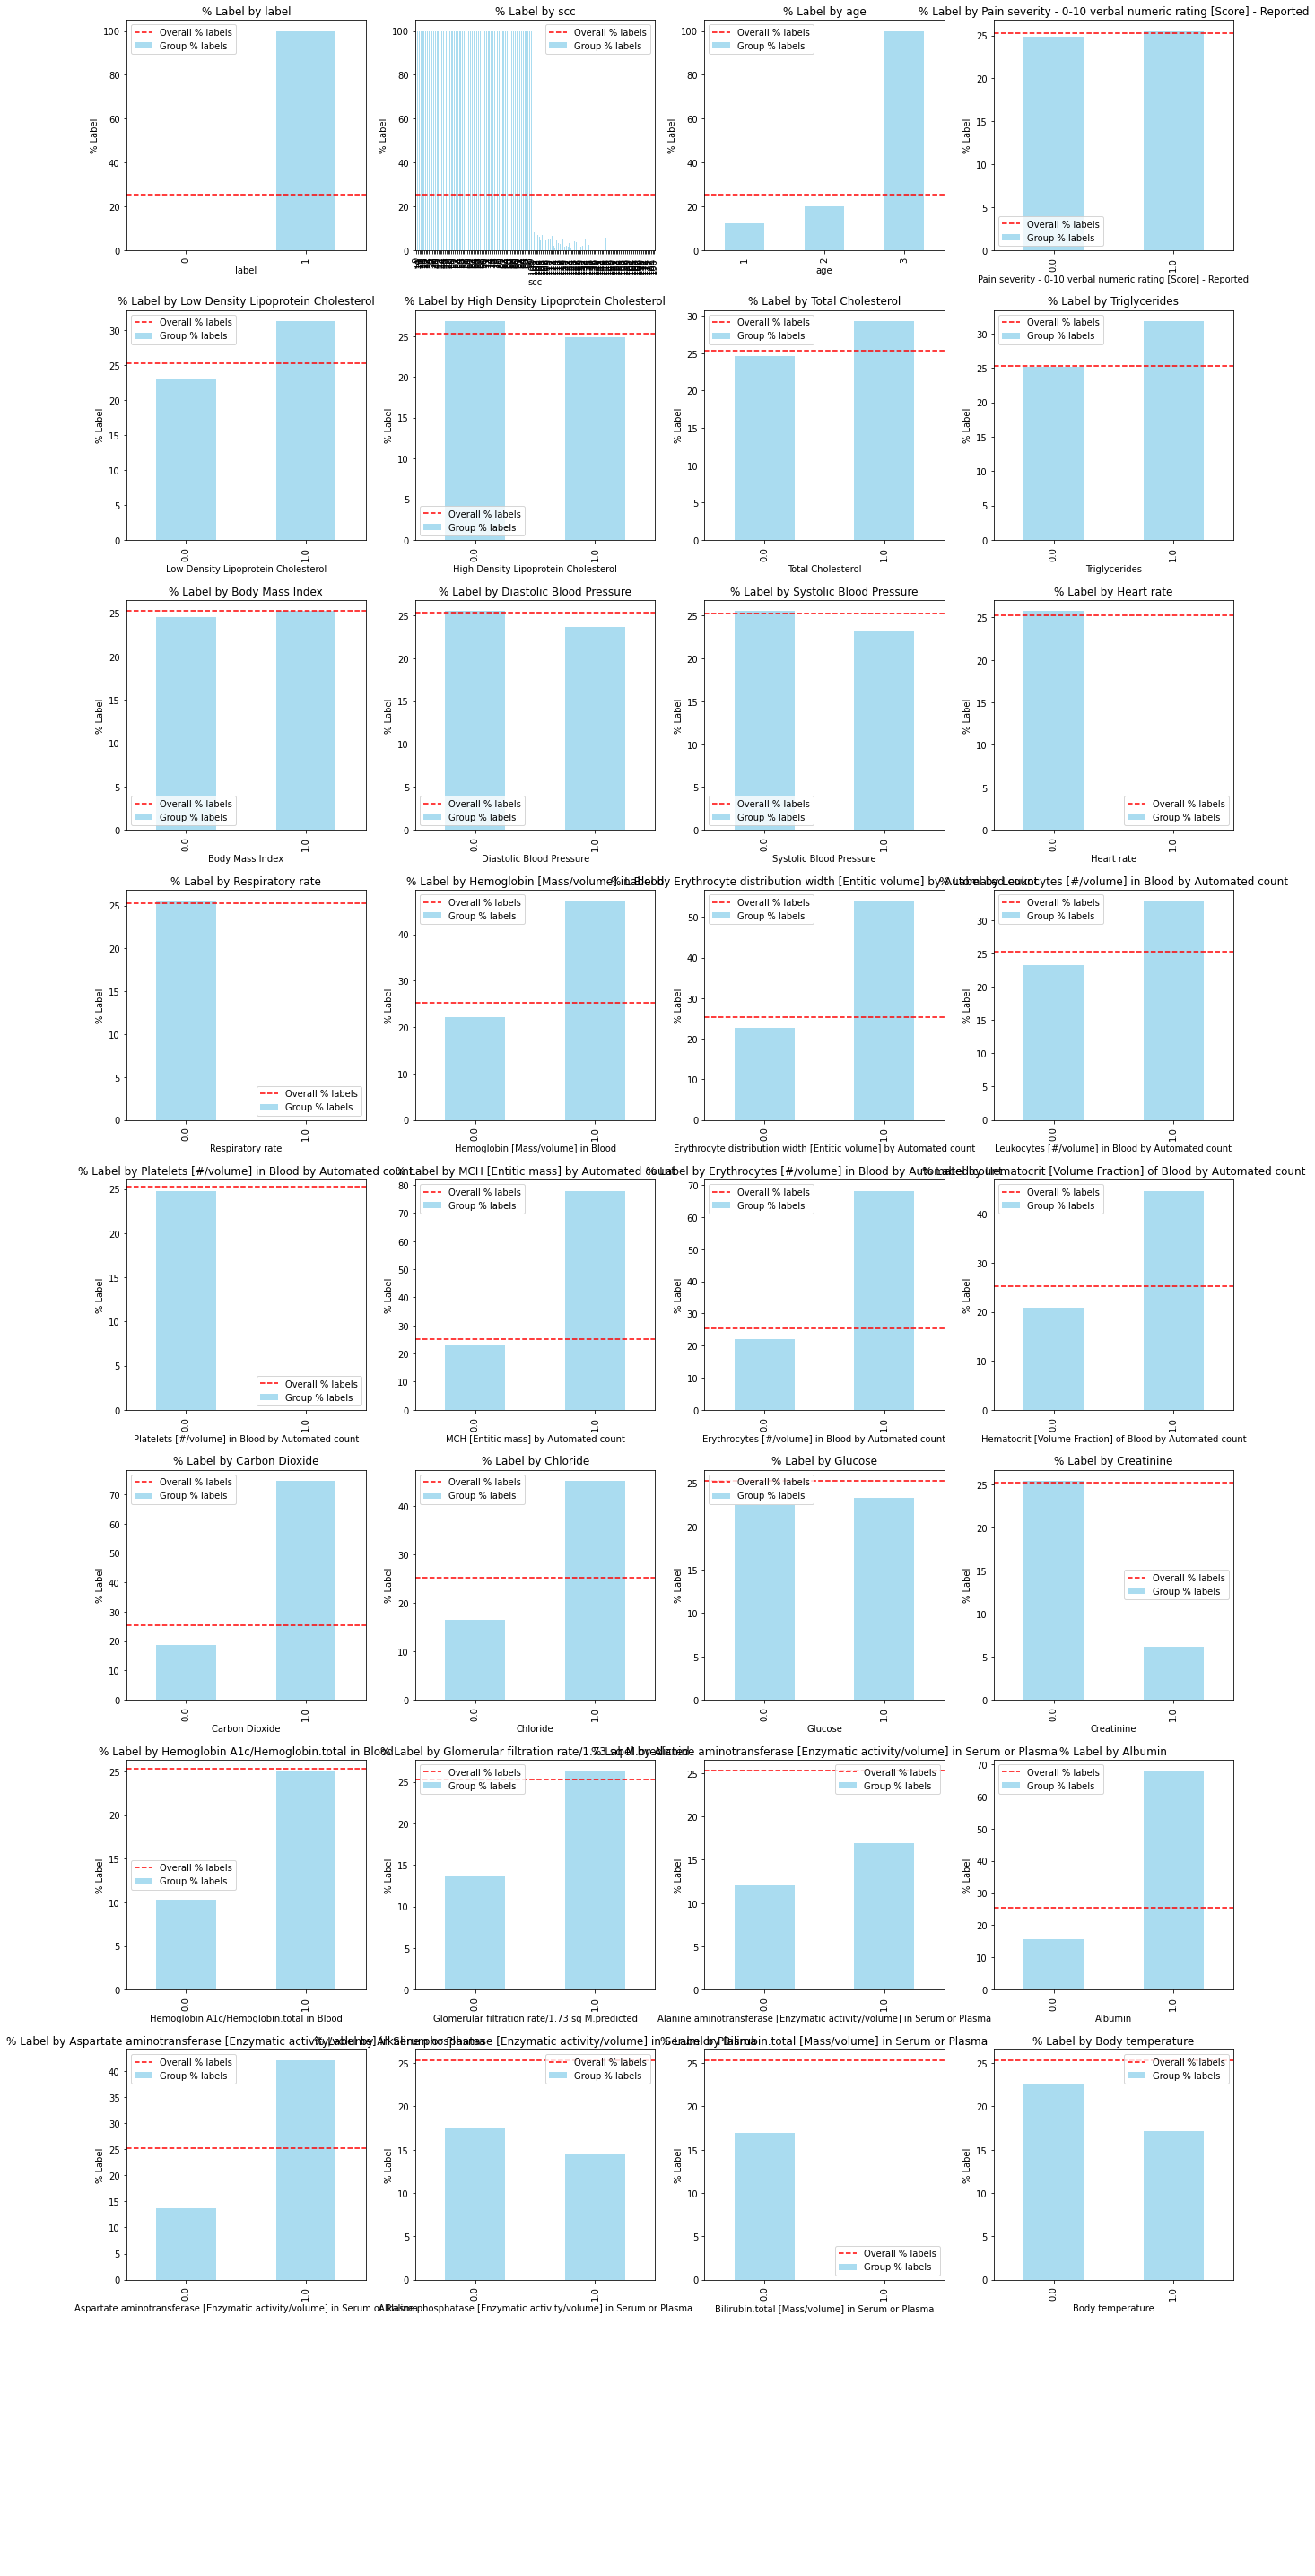

In [16]:
numeric_columns = df2.select_dtypes(include=['int64', 'float64'])
label_percentage = {}
for column in numeric_columns:
    label_percentage[column] = df2.groupby(column)['label'].mean() * 100

overall_label_percentage = df2['label'].mean() * 100

fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(18, 40))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    ax = axes[i]
    label_percentage[column].plot(kind='bar', ax=ax, color='skyblue', alpha=0.7, label='Group % labels')
    ax.axhline(overall_label_percentage, color='red', linestyle='--', label='Overall % labels')
    ax.set_title(f'% Label by {column}')
    ax.set_ylabel('% Label')
    ax.legend()

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [17]:
df2.shape

(9048, 35)

Heatmap of correlation matrix of endoded columns

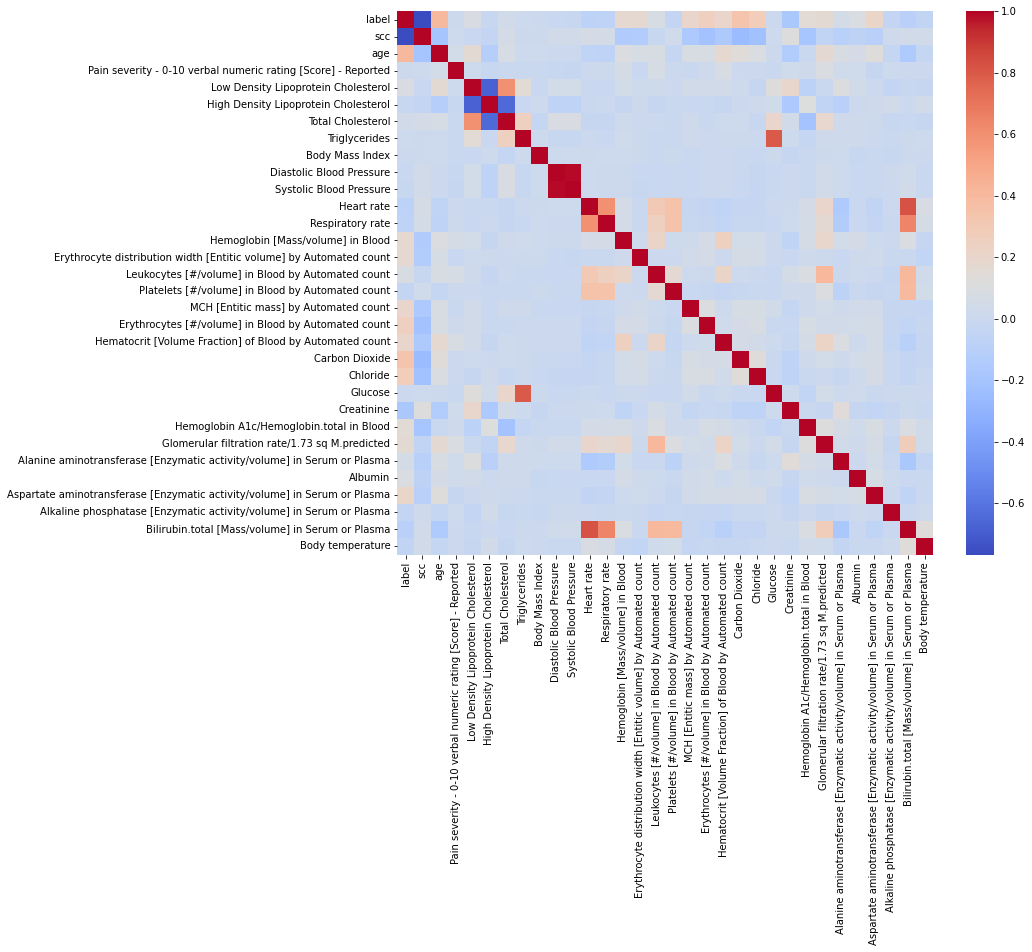

In [18]:
plt.figure(figsize=(12, 10)) 
sns.heatmap(df2.corr(), annot=False, cmap='coolwarm', fmt=".2f") 
plt.show()

In [20]:
null_percentages = [{"Column": column, "Null Percentage": df[column].isnull().mean() * 100} for column in df.columns]
print(tabulate(null_percentages, headers="keys", tablefmt="simple"))

Column                                                                       Null Percentage
-------------------------------------------------------------------------  -----------------
label                                                                              0
scc                                                                                0
marital                                                                            0
gender                                                                             0
age                                                                                0
Pain severity - 0-10 verbal numeric rating [Score] - Reported                      0.0442087
Low Density Lipoprotein Cholesterol                                                0.0552608
High Density Lipoprotein Cholesterol                                               0.0552608
Total Cholesterol                                                                  0.0552608
Triglycerides    

## Nulls by rows

In [21]:
print("Mean of nulls by rows: ", df2.isnull().mean(axis=1).mean())

Mean of nulls by rows:  0.10052103069344889


In [22]:
num_rows = (df2.isna().mean(axis=1) > 0.5).sum()
print(f"Number of rows with over 50% nulls: {num_rows}")

Number of rows with over 50% nulls: 28


We will delete rows with over 50% of nulls.

In [23]:
df2 = df2.loc[df2.isnull().mean(axis=1) <= 0.5]
num_rows = (df2.isna().mean(axis=1) > 0.5).sum()
print(f"Number of rows with over 50% nulls: {num_rows}")

Number of rows with over 50% nulls: 0


In [24]:
df2.shape

(9020, 35)

After first part of data preprocessing we have 35 columns and 9020 rows left.